### Resources

- http://hdr.undp.org/sites/default/files/hdr2019_technical_notes.pdf
- http://hdr.undp.org/en/data#
- https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2012-Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

### Numbeo Cities

In [2]:
# from https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2012-Q1
dfNumbeo = pd.read_csv(r"data/Numbeo.csv",sep=";",decimal=",")
dfNumbeo.columns = ['Period', 'City', 'NumbeoIndex', 'PurchasingPower', 'Safety', 'HealthCare', 'CostOfLiving', 'PropertyPriceToIncomeRatio', 'TrafficCommuteTime','Pollution', 'Climate']

dfNumbeo[['City','Country','Country2']] = dfNumbeo['City'].str.split(',',expand=True)
#why does it introduce another column?
#dfNumbeo.to_csv("numbeoprocessed.csv", index=False)
#Answer United States is part of the city name, so dropping this column...
dfNumbeo.drop('Country2', axis=1, inplace=True)
dfNumbeo2012 = dfNumbeo.set_index('Period').loc['2012-Q1',:]
dfNumbeo2012.reset_index(inplace=True)
dfNumbeo2012['Country'] = dfNumbeo2012.Country.str.strip()
dfNumbeo2012.set_index('City',inplace=True, drop=False)
# fix us of a cities/country
dfNumbeo2012.loc['San Francisco','Country'] = "United States"
dfNumbeo2012.loc['Los Angeles','Country'] = "United States"
dfNumbeo2012.loc['New York','Country'] = "United States"
dfNumbeo2012["NumbeoRank"] = dfNumbeo2012["NumbeoIndex"].rank(ascending=False) 
dfNumbeo2012



,Period,City,NumbeoIndex,PurchasingPower,Safety,HealthCare,CostOfLiving,PropertyPriceToIncomeRatio,TrafficCommuteTime,Pollution,Climate,Country,NumbeoRank
City,,,,,,,,,,,,,
Berlin,2012-Q1,Berlin,215.25,140.62,77.34,64.81,89.06,5.74,23.00,40.00,NaN,Germany,1.0
Zurich,2012-Q1,Zurich,213.18,136.31,83.85,77.78,166.07,8.27,27.33,26.50,NaN,Switzerland,2.0
Edmonton,2012-Q1,Edmonton,204.86,124.69,58.98,78.89,112.10,3.59,35.33,21.25,NaN,Canada,3.0
Perth,2012-Q1,Perth,196.00,118.34,48.75,87.04,142.18,5.24,27.00,15.00,NaN,Australia,4.0
Calgary,2012-Q1,Calgary,190.78,124.25,71.88,70.42,111.71,4.58,62.00,25.08,NaN,Canada,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cairo,2012-Q1,Cairo,-35.66,18.35,61.33,70.83,52.69,15.51,58.75,129.50,NaN,Egypt,57.0
Tehran,2012-Q1,Tehran,-50.44,47.52,43.27,43.40,60.86,13.72,73.50,140.75,NaN,Iran,58.0
Moscow,2012-Q1,Moscow,-54.72,46.75,47.33,37.75,86.77,28.06,61.50,116.61,NaN,Russia,59.0


### Human Development Index (HDI) Countries

In [3]:
# from http://hdr.undp.org/en/data#
hdi = pd.read_csv('./data/human-development-index.csv', header=1)
hdi.head()

,HDI Rank (2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,149,Angola,..,..,..,..,..,..,..,..,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


**align hdi country names with numbeo**

In [4]:
hdi["HDIRank(2012)"] = hdi["2012"].rank(method='dense', ascending=False)
# convert countries to numbeo notation
hdi.loc[hdi['Country'] == 'Czechia', 'Country'] = 'Czech Republic'
hdi.loc[hdi['Country'] == 'Iran (Islamic Republic of)', 'Country'] = 'Iran'
hdi.loc[hdi['Country'] == 'Russian Federation', 'Country'] = 'Russia'
hdi.loc[hdi['Country'] == 'Bolivia (Plurinational State of)', 'Country'] = 'Bolivia'
hdi.loc[hdi['Country'] == 'Moldova (Republic of)', 'Country'] = 'Moldova'
hdi.loc[hdi['Country'] == 'Korea (Republic of)', 'Country'] = 'Republic of Korea'
hdi.loc[hdi['Country'] == 'Tanzania (United Republic of)', 'Country'] = 'United Republic of Tanzania'
hdi.head()

,HDI Rank (2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,HDIRank(2012)
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496,155.0
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791,59.0
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759,75.0
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857,31.0
4,149,Angola,..,..,..,..,..,..,..,..,...,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574,137.0


In [5]:
print(f'number numbeo rows {dfNumbeo2012.shape[0]}')
numbeo2012_vs_hdi = pd.merge(dfNumbeo2012, hdi, how='inner', on='Country')
print(f'joined {numbeo2012_vs_hdi.shape[0]} cities from numbeo with countries from hdi')

number numbeo rows 61
joined 61 cities from numbeo with countries from hdi


**Common Correlation Function**

In [6]:
def eval_corr(df, rankA, rankB, title):
    fig = plt.figure(figsize=(13,13))
    g = sns.pairplot(df.loc[:,[rankA,rankB]],kind="reg")
    g.fig.suptitle(title, y=0.97,fontsize=14)
    g.fig.subplots_adjust(top=0.85,left=0.2,bottom=0.1)
    g.fig.savefig(f'visuals/CorrelationOf{rankA}vs{rankB}.png')

    spearman_df = spearmanr(df[rankA], df[rankB])
    print(f'spearman relation between {rankA} and {rankB}: {spearman_df}')
    
    df["CityPerformance"] = df[rankA] - df[rankB]
    print(f'10 Cities which perform better than their country ({rankA} vs {rankB})')
    display(df.sort_values("CityPerformance", ascending=True)[["City", "Country", rankA, rankB]].head(10))
    print(f'10 Cities which perform worse than their country ({rankA} vs {rankB})')
    display(df.sort_values("CityPerformance", ascending=False)[["City", "Country", rankA, rankB]].head(10))

### Numbeo Cities vs Human Development Index (HDI) Countries

spearman relation between NumbeoRank and HDIRank(2012): SpearmanrResult(correlation=0.7484288311224342, pvalue=4.099272073255796e-12)
10 Cities which perform better than their country (NumbeoRank vs HDIRank(2012))


,City,Country,NumbeoRank,HDIRank(2012)
27,Bangalore,India,27.0,119.0
28,Pune,India,34.0,119.0
29,Chennai,India,40.0,119.0
30,Delhi,India,41.0,119.0
31,Mumbai,India,46.0,119.0
39,Johannesburg,South Africa,32.0,102.0
32,Kolkata,India,60.0,119.0
34,Curitiba,Brazil,30.0,77.0
57,Cairo,Egypt,57.0,101.0
49,Bogota,Colombia,44.0,76.0


10 Cities which perform worse than their country (NumbeoRank vs HDIRank(2012))


,City,Country,NumbeoRank,HDIRank(2012)
51,Rome,Italy,55.0,23.0
48,Athens,Greece,56.0,27.0
44,London,United Kingdom,38.0,15.0
50,Milan,Italy,45.0,23.0
26,Singapore,Singapore,26.0,7.0
10,Melbourne,Australia,22.0,3.0
33,Brussels,Belgium,29.0,13.0
47,Thessaloniki,Greece,43.0,27.0
40,Paris,France,33.0,21.0
17,New York,United States,19.0,8.0


<Figure size 936x936 with 0 Axes>

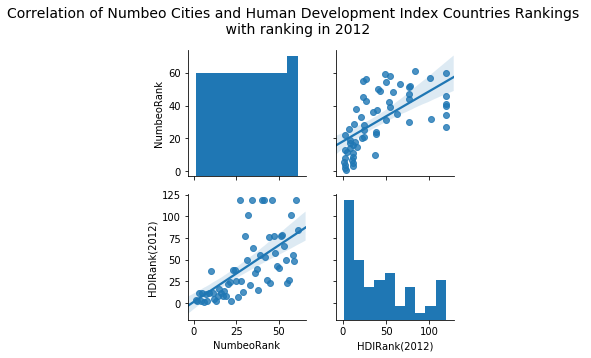

In [7]:
eval_corr(numbeo2012_vs_hdi, 'NumbeoRank', 'HDIRank(2012)', "Correlation of Numbeo Cities and Human Development Index Countries Rankings \n with ranking in 2012")

### Numbeo Cities vs Human Development Index (HDI) Countries (reranked)

spearman relation between NumbeoRank and HDIReRank(2012): SpearmanrResult(correlation=0.7484288311224342, pvalue=4.099272073255796e-12)
10 Cities which perform better than their country (NumbeoRank vs HDIReRank(2012))


,City,Country,NumbeoRank,HDIReRank(2012)
27,Bangalore,India,27.0,39.0
13,Dubai,United Arab Emirates,10.0,21.0
2,Edmonton,Canada,3.0,9.0
39,Johannesburg,South Africa,32.0,38.0
28,Pune,India,34.0,39.0
3,Calgary,Canada,5.0,9.0
34,Curitiba,Brazil,30.0,34.0
0,Berlin,Germany,1.0,4.0
12,Stockholm,Sweden,7.0,8.0
1,Zurich,Switzerland,2.0,2.0


10 Cities which perform worse than their country (NumbeoRank vs HDIReRank(2012))


,City,Country,NumbeoRank,HDIReRank(2012)
51,Rome,Italy,55.0,16.0
48,Athens,Greece,56.0,19.0
59,Moscow,Russia,59.0,26.0
50,Milan,Italy,45.0,16.0
58,Tehran,Iran,58.0,29.0
38,Bucharest,Romania,54.0,27.0
44,London,United Kingdom,38.0,12.0
54,Buenos Aires,Argentina,50.0,24.0
60,Shanghai,China,61.0,36.0
53,Santiago,Chile,49.0,25.0


<Figure size 936x936 with 0 Axes>

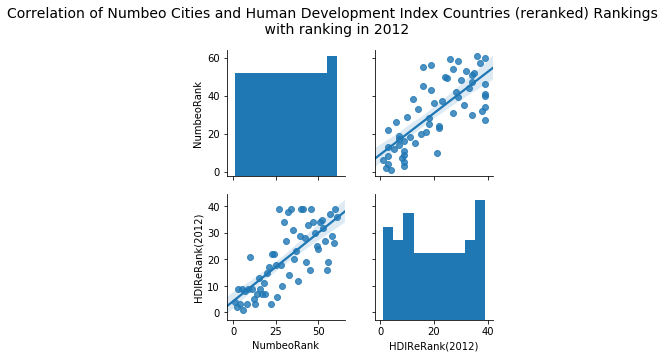

In [8]:
numbeo2012_vs_hdi["HDIReRank(2012)"] = numbeo2012_vs_hdi["HDIRank(2012)"].rank(method='dense', ascending=True) 
eval_corr(numbeo2012_vs_hdi, 'NumbeoRank', 'HDIReRank(2012)', "Correlation of Numbeo Cities and Human Development Index Countries (reranked) Rankings \n with ranking in 2012")

### Numbeo Countries

In [9]:
dfNumbeo2012Countries = pd.read_csv(r"./data/numbeo-by-country.csv", header=0)
dfNumbeo2012Countries["NumbeoCountryRank"] = dfNumbeo2012Countries["Rank"]
dfNumbeo2012Countries.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,NumbeoCountryRank
0,1,Switzerland,194.11,127.42,74.22,79.51,148.69,6.53,30.88,35.49,-,1
1,2,Germany,184.42,114.22,78.80,71.96,92.83,4.80,33.12,45.14,-,2
2,3,Norway,183.43,94.21,80.93,79.04,166.65,7.10,18.50,19.22,-,3
3,4,United Arab Emirates,177.07,134.89,64.05,63.89,80.79,4.49,17.00,69.17,-,4
4,5,New Zealand,174.28,88.59,53.19,86.81,107.37,5.71,25.25,17.08,-,5


### Numbeo Cities vs Numbeo Countries

joined 61 numbeo cities with countries
spearman relation between NumbeoRank and NumbeoCountryRank: SpearmanrResult(correlation=0.9054556053590573, pvalue=1.2516328518027238e-23)
10 Cities which perform better than their country (NumbeoRank vs NumbeoCountryRank)


,City,Country,NumbeoRank,NumbeoCountryRank
34,Curitiba,Brazil,30.0,44
37,Constanta,Romania,31.0,39
27,Bangalore,India,27.0,33
7,Perth,Australia,4.0,9
2,Edmonton,Canada,3.0,7
3,Calgary,Canada,5.0,7
8,Sydney,Australia,8.0,9
0,Berlin,Germany,1.0,2
28,Pune,India,34.0,33
12,Stockholm,Sweden,7.0,6


10 Cities which perform worse than their country (NumbeoRank vs NumbeoCountryRank)


,City,Country,NumbeoRank,NumbeoCountryRank
32,Kolkata,India,60.0,33
51,Rome,Italy,55.0,31
56,Mexico City,Mexico,53.0,30
44,London,United Kingdom,38.0,18
40,Paris,France,33.0,16
38,Bucharest,Romania,54.0,39
48,Athens,Greece,56.0,42
50,Milan,Italy,45.0,31
54,Buenos Aires,Argentina,50.0,36
31,Mumbai,India,46.0,33


<Figure size 936x936 with 0 Axes>

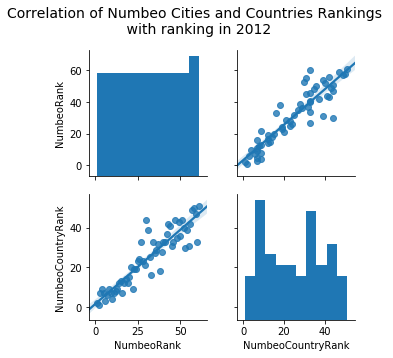

In [10]:
numbeo2012_vs_numbeo2012_countries = pd.merge(dfNumbeo2012, dfNumbeo2012Countries, how='inner', on='Country')
print(f'joined {numbeo2012_vs_numbeo2012_countries.shape[0]} numbeo cities with countries')
eval_corr(numbeo2012_vs_numbeo2012_countries, 'NumbeoRank', 'NumbeoCountryRank', "Correlation of Numbeo Cities and Countries Rankings \n with ranking in 2012")

### Mercer Cities

In [11]:
##loading mercer data extracted from https://en.wikipedia.org/wiki/Mercer_Quality_of_Living_Survey
dfMercer = pd.read_csv('data/Mercer.csv')
dfMercer.columns = ['City','Country','MercerIndex','Year','MercerRank']
dfMercer2012 = dfMercer.loc[dfMercer['Year']== 2012,:]
dfMercer2012.set_index('City',inplace=True, drop=False)
print(dfMercer2012.shape)
display(dfMercer2012.head())

(48, 5)


,City,Country,MercerIndex,Year,MercerRank
City,,,,,
Vienna,Vienna,Austria,108.6,2012,1
Zürich,Zürich,Switzerland,108.0,2012,2
Munich,Munich,Germany,107.0,2012,4
Auckland,Auckland,New Zealand,107.4,2012,3
Vancouver,Vancouver,Canada,107.4,2012,5


### Mercer Cities vs Human Development Index (HDI) Countries

joined 48 cities from mercer with countries from hdi
spearman relation between MercerRank and HDIRank(2012): SpearmanrResult(correlation=0.3858741444393683, pvalue=0.006754079985807887)
10 Cities which perform better than their country (MercerRank vs HDIRank(2012))


,City,Country,MercerRank,HDIRank(2012)
0,Vienna,Austria,1,14.0
11,Auckland,New Zealand,3,13.0
13,Vancouver,Canada,5,12.0
1,Zürich,Switzerland,2,2.0
4,Munich,Germany,4,4.0
12,Wellington,New Zealand,13,13.0
26,Luxembourg,Luxembourg,19,18.0
15,Ottawa,Canada,14,12.0
5,Düsseldorf,Germany,6,4.0
14,Toronto,Canada,15,12.0


10 Cities which perform worse than their country (MercerRank vs HDIRank(2012))


,City,Country,MercerRank,HDIRank(2012)
36,New York City,United States,44,8.0
37,Seattle,United States,44,8.0
39,"Washington, D.C.",United States,43,8.0
24,Brisbane,Australia,37,3.0
38,Chicago,United States,42,8.0
47,Kobe,Japan,48,16.0
29,Oslo,Norway,32,1.0
46,Tokyo,Japan,44,16.0
34,Boston,United States,35,8.0
22,Adelaide,Australia,29,3.0


<Figure size 936x936 with 0 Axes>

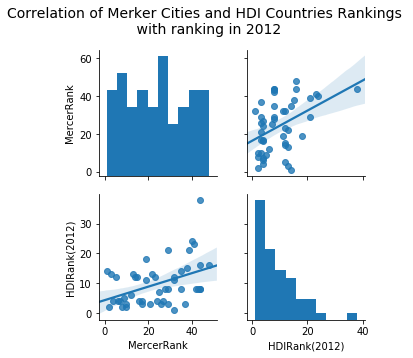

In [12]:
mercer2012_vs_hdi = pd.merge(dfMercer2012, hdi, how='inner', on='Country')
print(f'joined {mercer2012_vs_hdi.shape[0]} cities from mercer with countries from hdi')
eval_corr(mercer2012_vs_hdi, 'MercerRank', 'HDIRank(2012)', "Correlation of Merker Cities and HDI Countries Rankings \n with ranking in 2012")

### Mercer Cities vs Numbeo Countries

joined 46 cities from mercer with countries from hdi
spearman relation between MercerRank and NumbeoCountryRank: SpearmanrResult(correlation=0.6846968929649597, pvalue=1.5403400899054224e-07)
10 Cities which perform better than their country (MercerRank vs NumbeoCountryRank)


,City,Country,MercerRank,NumbeoCountryRank
0,Vienna,Austria,1,10
13,Vancouver,Canada,5,7
11,Auckland,New Zealand,3,5
27,Singapore,Singapore,25,24
25,Amsterdam,Netherlands,12,11
19,Sydney,Australia,10,9
18,Copenhagen,Denmark,9,8
29,Brussels,Belgium,22,21
1,Zürich,Switzerland,2,1
4,Munich,Germany,4,2


10 Cities which perform worse than their country (MercerRank vs NumbeoCountryRank)


,City,Country,MercerRank,NumbeoCountryRank
45,Kobe,Japan,48,13
34,New York City,United States,44,12
35,Seattle,United States,44,12
37,"Washington, D.C.",United States,43,12
44,Tokyo,Japan,44,13
36,Chicago,United States,42,12
28,Oslo,Norway,32,3
24,Brisbane,Australia,37,9
38,Lisbon,Portugal,44,19
10,Stuttgart,Germany,27,2


<Figure size 936x936 with 0 Axes>

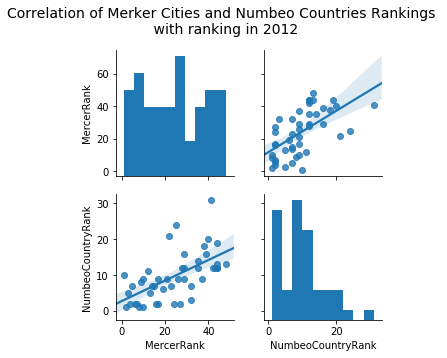

In [13]:
mercer2012_vs_numbeo_countries = pd.merge(dfMercer2012, dfNumbeo2012Countries, how='inner', on='Country')
print(f'joined {mercer2012_vs_numbeo_countries.shape[0]} cities from mercer with countries from hdi')
eval_corr(mercer2012_vs_numbeo_countries, 'MercerRank', 'NumbeoCountryRank', "Correlation of Merker Cities and Numbeo Countries Rankings \n with ranking in 2012")

### UN Prosperity Cities

In [14]:
#Source: United Nations Human Settlements Programme (UN-Habitat), Global Urban Indicators Database 2012.
dfProsperity2012 = pd.read_csv('data/city-prosperity-index_country.csv')
dfProsperity2012.columns = ['Country','City','Cpi5','Cpi4','Productivity','QoLUN','Infrastructure','Environment','Equity']

dfProsperity2012 = dfProsperity2012.set_index('City', drop=False)

dfProsperity2012["UNRank"] = dfProsperity2012["QoLUN"].rank(ascending=False)

print(dfProsperity2012.shape)
display(dfProsperity2012.head())

(69, 10)


,Country,City,Cpi5,Cpi4,Productivity,QoLUN,Infrastructure,Environment,Equity,UNRank
City,,,,,,,,,,
Yerevan,Armenia,Yerevan,0.779,0.769,0.635,0.850,0.870,0.745,0.817,24.5
Melbourne,Australia,Melbourne,0.903,0.925,0.867,0.875,0.996,0.967,0.820,14.0
Vienna,Austria,Vienna,0.925,0.936,0.939,0.882,0.996,0.932,0.883,13.0
Dhaka,Bangladesh,Dhaka,0.633,0.593,0.545,0.539,0.673,0.627,0.817,57.0
Brussels,Belgium,Brussels,0.883,0.910,0.862,0.864,0.997,0.922,0.783,21.5


### UN Prosperity Cities vs HDI Countries

joined 69 cities from prosperity with countries from hdi
spearman relation between UNRank and HDIRank(2012): SpearmanrResult(correlation=0.9267292182144561, pvalue=3.435391011305455e-30)
10 Cities which perform better than their country (UNRank vs HDIRank(2012))


,City,Country,UNRank,HDIRank(2012)
44,Niamey,Niger,65.0,175.0
16,Addis Ababa,Ethiopia,58.0,165.0
36,Bamako,Mali,66.0,170.0
22,Conakry,Guinea,62.0,164.0
45,Lagos,Nigeria,48.0,147.0
12,Abidjan,Côte d'Ivoire,64.0,157.0
34,Monrovia,Liberia,68.0,159.0
61,Kampala,Uganda,60.0,150.0
35,Antananarivo,Madagascar,54.0,144.0
53,Dakar,Senegal,67.0,151.0


10 Cities which perform worse than their country (UNRank vs HDIRank(2012))


,City,Country,UNRank,HDIRank(2012)
58,Zurich,Switzerland,23.0,2.0
65,New York,United States,20.0,8.0
1,Melbourne,Australia,14.0,3.0
14,Copenhagen,Denmark,16.0,5.0
13,Prague,Czech Republic,34.0,25.0
42,Amsterdam,Netherlands,15.0,6.0
4,Brussels,Belgium,21.5,13.0
28,Dublin,Ireland,18.0,14.0
46,Oslo,Norway,4.0,1.0
2,Vienna,Austria,13.0,14.0


<Figure size 936x936 with 0 Axes>

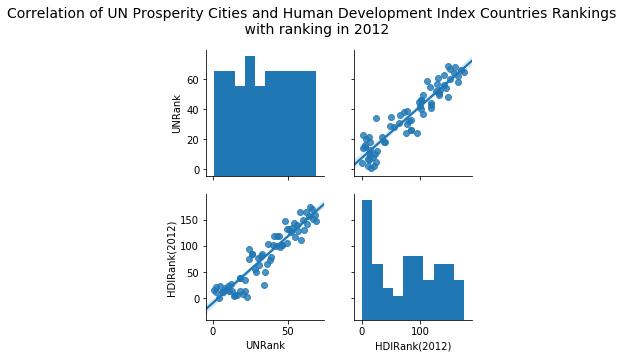

In [15]:
prosperity2012_vs_hdi = pd.merge(dfProsperity2012, hdi, how='inner', on='Country')
print(f'joined {prosperity2012_vs_hdi.shape[0]} cities from prosperity with countries from hdi')
eval_corr(prosperity2012_vs_hdi, 'UNRank', 'HDIRank(2012)', "Correlation of UN Prosperity Cities and Human Development Index Countries Rankings \n with ranking in 2012")

### UN Prosperity Cities vs Numbeo Countries

joined 38 cities from prosperity with countries from numbeo
spearman relation between UNRank and NumbeoCountryRank: SpearmanrResult(correlation=0.6276892992568064, pvalue=2.4630131615641274e-05)
10 Cities which perform better than their country (UNRank vs NumbeoCountryRank)


,City,Country,UNRank,NumbeoCountryRank
11,Athens,Greece,12.0,42
5,Beijing,China,26.5,51
6,Shanghai,China,26.5,51
17,Milan,Italy,10.0,31
27,Moscow,Russia,29.0,47
30,Barcelona,Spain,5.0,20
12,Budapest,Hungary,18.0,32
3,São Paulo,Brazil,30.0,44
10,Paris,France,2.5,16
18,Tokyo,Japan,1.0,13


10 Cities which perform worse than their country (UNRank vs NumbeoCountryRank)


,City,Country,UNRank,NumbeoCountryRank
32,Zurich,Switzerland,23.0,1
29,Johannesburg,South Africa,46.5,25
28,Cape Town,South Africa,46.5,25
7,Prague,Czech Republic,34.0,23
14,New Delhi,India,44.0,33
37,New York,United States,20.0,12
13,Mumbai,India,41.0,33
15,Jakarta,Indonesia,42.0,34
8,Copenhagen,Denmark,16.0,8
21,Auckland,New Zealand,11.0,5


<Figure size 936x936 with 0 Axes>

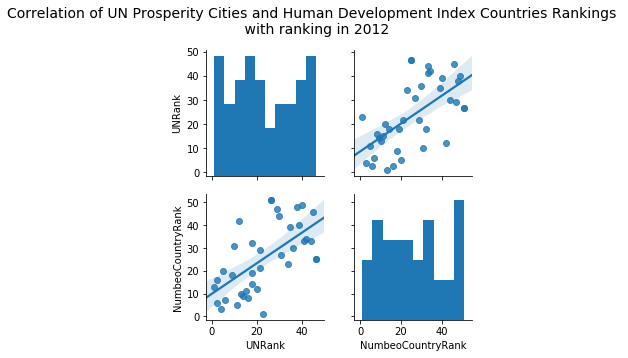

In [16]:
prosperity2012_vs_hdi = pd.merge(dfProsperity2012, dfNumbeo2012Countries, how='inner', on='Country')
print(f'joined {prosperity2012_vs_hdi.shape[0]} cities from prosperity with countries from numbeo')
eval_corr(prosperity2012_vs_hdi, 'UNRank', 'NumbeoCountryRank', "Correlation of UN Prosperity Cities and Human Development Index Countries Rankings \n with ranking in 2012")
